# $\ell_2$ distance approach

We would like to see how well we can classify activities by simply using $\ell_2$ distance between the feature vectors. To do so, we are going to
* Import the entire dataset,
* Fix one subject,
* Compute pairwise $\ell_2$ distance between the feature vectors along with MDS plot,
* Validate approach via NN classifer accuracy score.
* Validate approach with k-fold Cross Validation.

Let's import the necessary modules and the dataset.

In [32]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.manifold import MDS
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score,StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

uci_test = pd.read_csv('./Data/UCI HAR Data Frame/uci_test.csv')
uci_train = pd.read_csv('./Data/UCI HAR Data Frame/uci_train.csv')
uci_df = pd.concat([uci_train,uci_test],ignore_index = True)

uci_df

subject          activity  tBodyAcc-mean()-X  tBodyAcc-mean()-Y  \
0            1          STANDING           0.288585          -0.020294   
1            1          STANDING           0.278419          -0.016411   
2            1          STANDING           0.279653          -0.019467   
3            1          STANDING           0.279174          -0.026201   
4            1          STANDING           0.276629          -0.016570   
...        ...               ...                ...                ...   
10294       24  WALKING_UPSTAIRS           0.310155          -0.053391   
10295       24  WALKING_UPSTAIRS           0.363385          -0.039214   
10296       24  WALKING_UPSTAIRS           0.349966           0.030077   
10297       24  WALKING_UPSTAIRS           0.237594           0.018467   
10298       24  WALKING_UPSTAIRS           0.153627          -0.018437   

       tBodyAcc-mean()-Z  tBodyAcc-std()-X  tBodyAcc-std()-Y  \
0              -0.132905         -0.995279         -0.983111   
1              -0.123520         -0.998245         -0.975300   
2              -0.113462         -0.995380         -0.967187   
3              -0.123283         -0.996091         -0.983403   
4              -0.115362         -0.998139         -0.980817   
...                  ...               ...               ...   
10294          -0.099109         -0.287866         -0.140589   
10295          -0.105915         -0.305388          0.028148   
10296          -0.115788         -0.329638         -0.042143   
10297          -0.096499         -0.323114         -0.229775   
10298          -0.137018         -0.330046         -0.195253   

       tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  ...  \
0             -0.913526         -0.995112         -0.983185  ...   
1             -0.960322         -0.998807         -0.974914  ...   
2             -0.978944         -0.996520         -0.963668  ...   
3             -0.990675         -0.997099         -0.982750  ...   
4             -0.990482         -0.998321         -0.979672  ...   
...                 ...               ...               ...  ...   
10294         -0.215088         -0.356083         -0.148775  ...   
10295         -0.196373         -0.373540         -0.030036  ...   
10296         -0.250181         -0.388017         -0.133257  ...   
10297         -0.207574         -0.392380         -0.279610  ...   
10298         -0.164339         -0.430974         -0.218295  ...   

       fBodyBodyGyroJerkMag-meanFreq()  fBodyBodyGyroJerkMag-skewness()  \
0                            -0.074323                        -0.298676   
1                             0.158075                        -0.595051   
2                             0.414503                        -0.390748   
3                             0.404573                        -0.117290   
4                             0.087753                        -0.351471   
...                                ...                              ...   
10294                         0.074472                        -0.376278   
10295                         0.101859                        -0.320418   
10296                        -0.066249                        -0.118854   
10297                        -0.046467                        -0.205445   
10298                        -0.010386                        -0.072237   

       fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyAccMean,gravity)  \
0                            -0.710304                    -0.112754   
1                            -0.861499                     0.053477   
2                            -0.760104                    -0.118559   
3                            -0.482845                    -0.036788   
4                            -0.699205                     0.123320   
...                                ...                          ...   
10294                        -0.750809                    -0.337422   
10295                        -0.700274                    -0.73

# Fixing a subject

We will subsample the dataset by fixing a subject. The idea is to test and see how well we can distinguish different activities of the subject by comparing $\ell_2$ distances between the feature vectors.

In [34]:
subject_index = 23 # choose subject
row_mask = uci_df["subject"] == subject_index
one_subject_df = uci_df[row_mask]
one_subject_df

subject          activity  tBodyAcc-mean()-X  tBodyAcc-mean()-Y  \
4694       23          STANDING           0.274939          -0.041828   
4695       23          STANDING           0.270479          -0.024814   
4696       23          STANDING           0.274899          -0.009655   
4697       23          STANDING           0.281910          -0.025533   
4698       23          STANDING           0.276809          -0.025567   
...       ...               ...                ...                ...   
5061       23  WALKING_UPSTAIRS           0.205033          -0.014518   
5062       23  WALKING_UPSTAIRS           0.351992          -0.057144   
5063       23  WALKING_UPSTAIRS           0.330006          -0.027141   
5064       23  WALKING_UPSTAIRS           0.230857           0.035871   
5065       23  WALKING_UPSTAIRS           0.211788           0.027422   

      tBodyAcc-mean()-Z  tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  \
4694          -0.119821         -0.965429         -0.929634         -0.835018   
4695          -0.101021         -0.952426         -0.886185         -0.779465   
4696          -0.077432         -0.958275         -0.897321         -0.786344   
4697          -0.160760         -0.987356         -0.925345         -0.838840   
4698          -0.151070         -0.994391         -0.970041         -0.899983   
...                 ...               ...               ...               ...   
5061          -0.115117         -0.154513          0.088274          0.024147   
5062          -0.047716         -0.162891          0.089462          0.057331   
5063          -0.127334         -0.169058         -0.003358          0.074553   
5064          -0.119403         -0.122188         -0.075595          0.029156   
5065          -0.099528         -0.225330         -0.037558          0.005040   

      tBodyAcc-mad()-X  tBodyAcc-mad()-Y  ...  \
4694         -0.974003         -0.941943  ...   
4695         -0.964196         -0.887124  ...   
4696         -0.971356         -0.894538  ...   
4697         -0.989237         -0.927540  ...   
4698         -0.995142         -0.967091  ...   
...                ...               ...  ...   
5061         -0.209957          0.088788  ...   
5062         -0.230699          0.040056  ...   
5063         -0.273894         -0.061094  ...   
5064         -0.188812         -0.078251  ...   
5065         -0.259565         -0.061294  ...   

      fBodyBodyGyroJerkMag-meanFreq()  fBodyBodyGyroJerkMag-skewness()  \
4694                        -0.045709                        -0.415686   
4695                        -0.029236                        -0.333371   
4696                        -0.112400                        -0.227916   
4697                        -0.136772                         0.521758   
4698                         0.016921                        -0.299285   
...                               ...                              ...   
5061                         0.510433                        -0.695106   
5062                         0.218140                        -0.491946   
5063                         0.147370                        -0.421489   
5064                         0.143458                        -0.762981   
5065                         0.257276                        -0.424314   

      fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyAccMean,gravity)  \
4694                        -0.806127                     0.040574   
4695                        -0.653112                     0.201026   
4696                        -0.582078                     0.039132   
4697                         0.314845                    -0.019871   
4698                        -0.709818                     0.005829   
...                               ...                          ...   
5061                        -0.911800                     0.673693   
5062                        -0.839309                    -0.201247   
5063                        -0.796533           

We extract the feature vectors and prepare labels.

In [35]:
one_subject_df_feature_vectors = one_subject_df.iloc[:,2:]
# labels = [one_subject_df.iloc[i]['activity'] for i in range(len(one_subject_df))]
labels = one_subject_df['activity'].tolist() # list of activity labels as strings.

In [36]:
one_subject_df_feature_vectors

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
4694           0.274939          -0.041828          -0.119821   
4695           0.270479          -0.024814          -0.101021   
4696           0.274899          -0.009655          -0.077432   
4697           0.281910          -0.025533          -0.160760   
4698           0.276809          -0.025567          -0.151070   
...                 ...                ...                ...   
5061           0.205033          -0.014518          -0.115117   
5062           0.351992          -0.057144          -0.047716   
5063           0.330006          -0.027141          -0.127334   
5064           0.230857           0.035871          -0.119403   
5065           0.211788           0.027422          -0.099528   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
4694         -0.965429         -0.929634         -0.835018         -0.974003   
4695         -0.952426         -0.886185         -0.779465         -0.964196   
4696         -0.958275         -0.897321         -0.786344         -0.971356   
4697         -0.987356         -0.925345         -0.838840         -0.989237   
4698         -0.994391         -0.970041         -0.899983         -0.995142   
...                ...               ...               ...               ...   
5061         -0.154513          0.088274          0.024147         -0.209957   
5062         -0.162891          0.089462          0.057331         -0.230699   
5063         -0.169058         -0.003358          0.074553         -0.273894   
5064         -0.122188         -0.075595          0.029156         -0.188812   
5065         -0.225330         -0.037558          0.005040         -0.259565   

      tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
4694         -0.941943         -0.819321         -0.894945  ...   
4695         -0.887124         -0.754986         -0.857205  ...   
4696         -0.894538         -0.763283         -0.857205  ...   
4697         -0.927540         -0.830513         -0.921276  ...   
4698         -0.967091         -0.887137         -0.929909  ...   
...                ...               ...               ...  ...   
5061          0.088788          0.014935         -0.205661  ...   
5062          0.040056          0.053582          0.202256  ...   
5063         -0.061094          0.099293          0.202256  ...   
5064         -0.078251         -0.006305         -0.069317  ...   
5065         -0.061294         -0.057491         -0.069317  ...   

      fBodyBodyGyroJerkMag-meanFreq()  fBodyBodyGyroJerkMag-skewness()  \
4694                        -0.045709                        -0.415686   
4695                        -0.029236                        -0.333371   
4696                        -0.112400                        -0.227916   
4697                        -0.136772                         0.521758   
4698                         0.016921                        -0.299285   
...                               ...                              ...   
5061                         0.510433                        -0.695106   
5062                         0.218140                        -0.491946   
5063                         0.147370                        -0.421489   
5064                         0.143458                        -0.762981   
5065                         0.257276                        -0.424314   

      fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyAccMean,gravity)  \
4694                        -0.806127                     0.040574   
4695                        -0.653112                     0.201026   
4696                        -0.582078                     0.039132   
4697                         0.314845                    -0.019871   
4698                        -0.709818                     0.005829   
...                               ...                          ...   
5061                        -0.911800                     0.673693   
5062      

# $\ell_2$ distance matrix

We now compute pairwise $\ell_2$ distances between the feature vectors.

In [37]:
import time
from tqdm import tqdm

In [38]:
%%time
def l2_dist(x,y):
    diff_vector = x - y
    return np.linalg.norm(x-y)

N = len(one_subject_df_feature_vectors)
dm = np.zeros((N,N))
np.fill_diagonal(dm,0)
for i in tqdm(range(N)):
    for j in range(1,N):
        x = one_subject_df_feature_vectors.iloc[i]
        y = one_subject_df_feature_vectors.iloc[j]
        dist = l2_dist(x,y)
        dm[i][j] = dist

dm += dm.T
        

100%|█████████████████████████████████████████| 372/372 [00:09<00:00, 39.68it/s]

CPU times: user 9.26 s, sys: 983 ms, total: 10.2 s
Wall time: 9.38 s


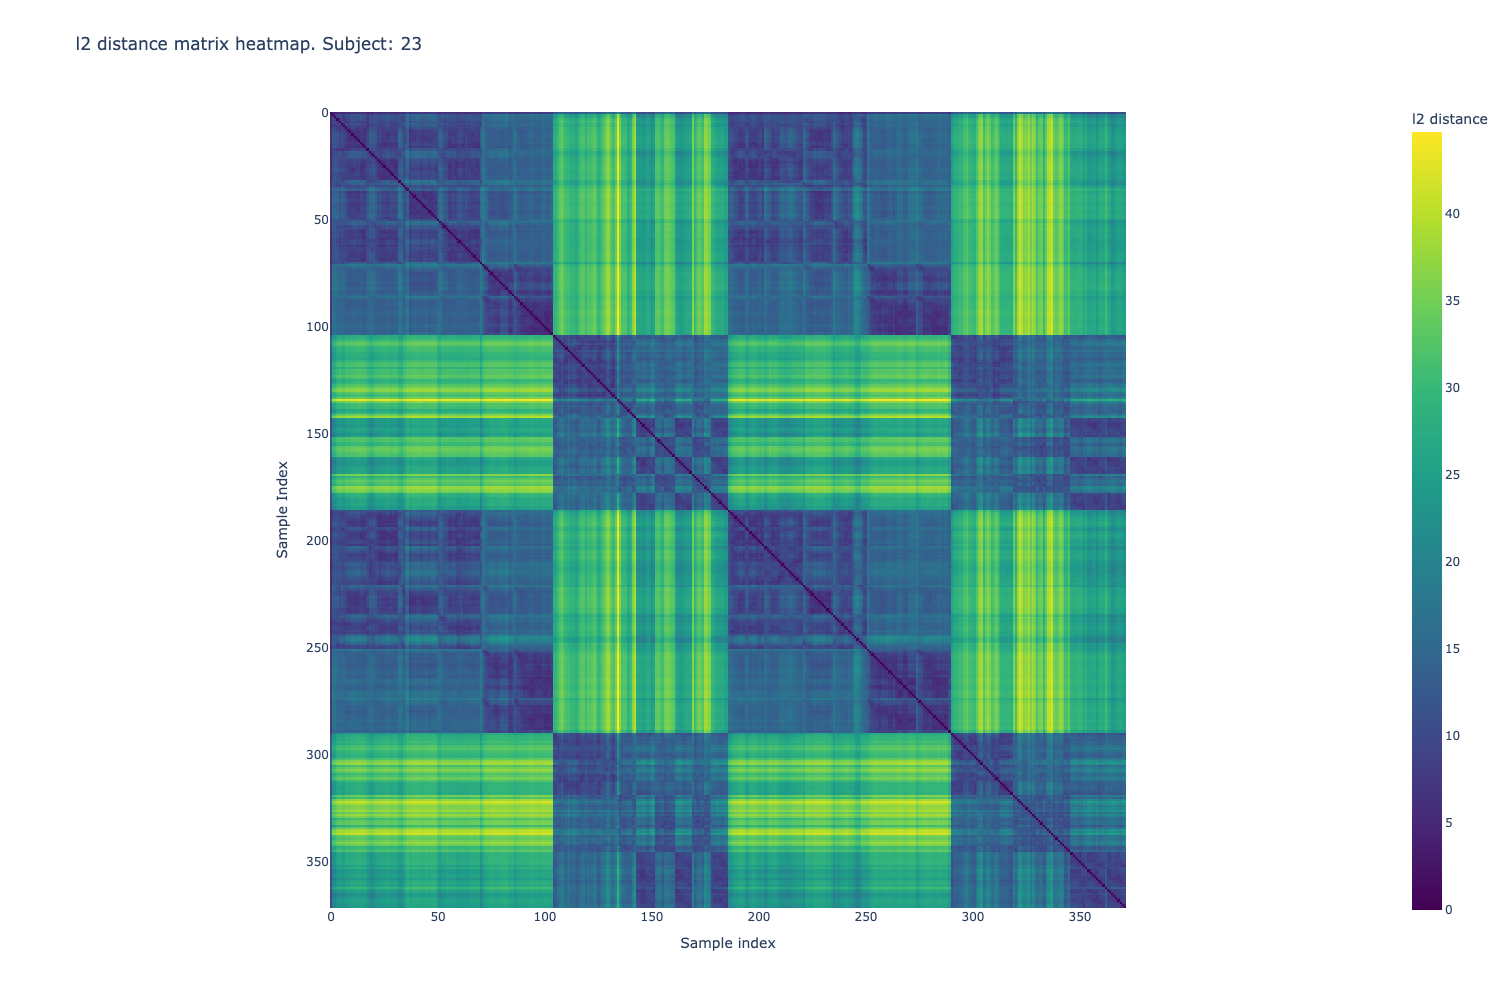

In [39]:
dm_df = pd.DataFrame(dm)

fig = px.imshow(dm_df,
                labels = dict( x = 'Sample index',y = 'Sample Index', color = 'l2 distance'),
                color_continuous_scale = 'Viridis',
                title = f'l2 distance matrix heatmap. Subject: {subject_index}'
               )

fig.update_layout(width = 1000,height = 1000)

fig.show()

# MDS Visualization of the $\ell_2$ distance matrix

We visualize the $\ell_2$ distance matrix with MDS in $\mathbb{R}^{3}$. It appears that there is a nice separation of activities, understood even from basic $\ell_2$ distance comparison.

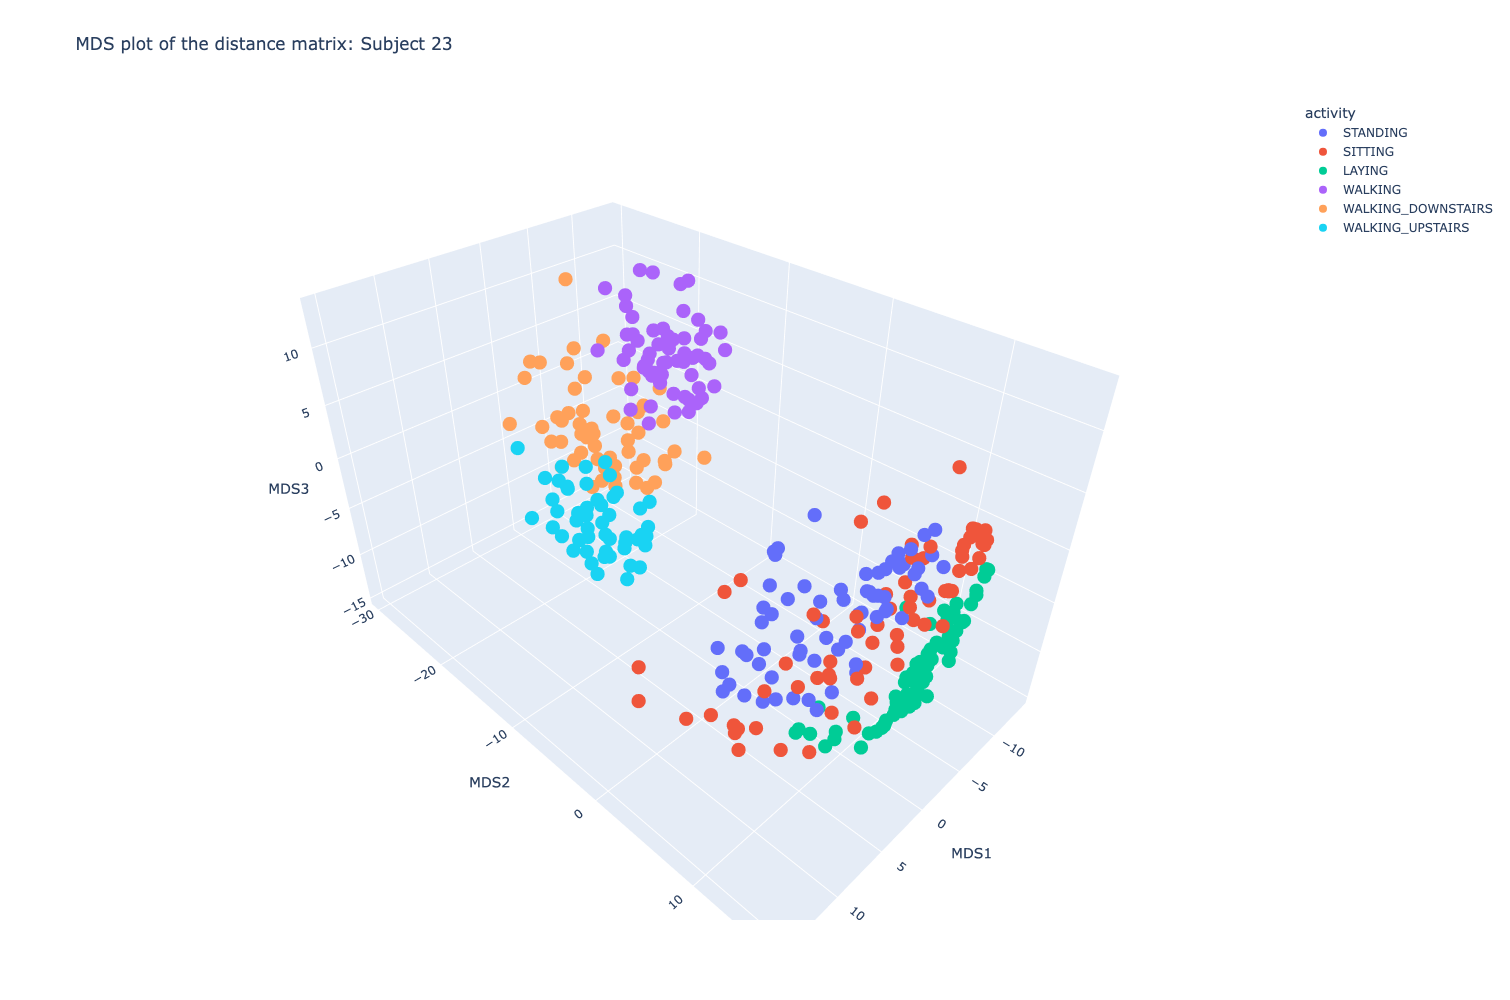

In [40]:
mds = MDS(n_components = 3,dissimilarity='precomputed',random_state = 42)
mds_coords = mds.fit_transform(dm)

mds_df = pd.DataFrame(mds_coords,columns = ['MDS1','MDS2','MDS3'])
mds_df['activity'] = labels

fig = px.scatter_3d(mds_df, x = 'MDS1', y = 'MDS2',z = 'MDS3',color = 'activity',
                   title = f'MDS plot of the distance matrix: Subject {subject_index}',
                   labels = {'color':'Activity'})

fig.update_layout(width = 1000,height = 1000)

fig.show()

# kNN Validation

We split the dataset (for the one subject) into train (70%) and testing sets (30%). For each sample in the testing set, we look at its $k$ nearest neighbors. The majority vote from these neighbors predict the class of our test sample. Accuracy score is given by
$$
\frac{\# \text{ Correct Predictions }}{\text{total} \# \text{ of samples}}
$$


It appears that our classifier does a perfect job with 100% accuracy.

In [42]:
# Convert string activity labels (e.g., 'WALKING', 'SITTING') into integer labels (e.g., 0, 1, 2)
le = LabelEncoder()
y = le.fit_transform(labels)

# Feature vectors (e.g., sensor data for each time window)
X = one_subject_df_feature_vectors

# Split the data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Set the number of neighbors (k) for the k-NN classifier
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the k-NN model to the training data
knn.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = knn.predict(X_test)

# Evaluate the accuracy of the classifier on the test set
accuracy = knn.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.99


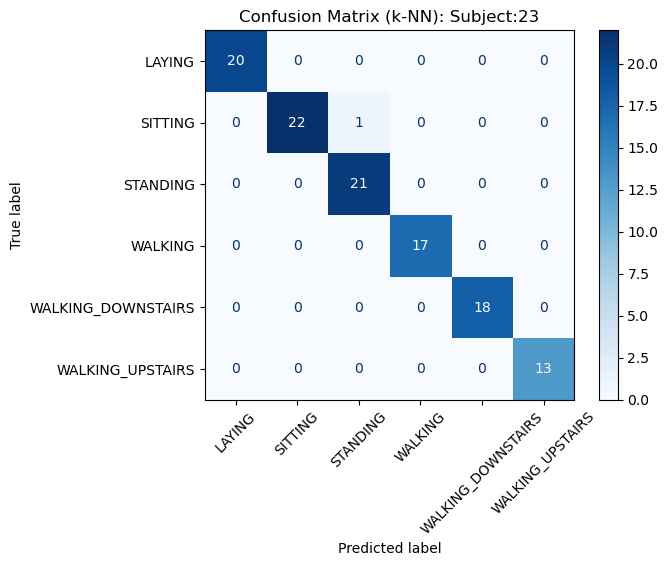

In [43]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with readable labels (optional but better)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues', xticks_rotation=45)

plt.title(f"Confusion Matrix (k-NN): Subject:{subject_index}")
plt.show()


# n-fold Cross validation

In [44]:


# Encode your labels as before
le = LabelEncoder()
y = le.fit_transform(labels)
X = one_subject_df_feature_vectors.to_numpy()

# Define a StratifiedKFold splitter with shuffling
cv = StratifiedKFold(n_splits=10, shuffle=True,random_state = 42)

# Instantiate your k-NN model
knn = KNeighborsClassifier(n_neighbors=3)

# Run cross-validation using the splitter
cv_scores = cross_val_score(knn, X, y, cv=cv)

print("Cross-validation scores:\n", cv_scores)
print(f"Mean accuracy:  {np.mean(cv_scores):.2f}")


Cross-validation scores:
 [0.97368421 0.94736842 1.         1.         0.97297297 1.
 1.         0.97297297 0.97297297 1.        ]
Mean accuracy:  0.98


# Make it more challenging

* The current data recordings were done with a fixed phone orientation. To be closer to reality, what would happen if the orientation was changed during each time-window? In other words is $\ell_2$ distance based approach invariant under orientation? I'm guessing the answer is no. Need to test this.

# Notes Jun 10:

* comparsion with the methods. have a baseline.
* simpler models sometimes better. can be used to argue.
* validate why you fix one subject. Given user data you can, person-specific.
* Try neural nets after shuffling.
* Write down notes as you work through. Bookkeeping.

